In [1]:
library('forecast')
options(repr.plot.width=16, repr.plot.height=9)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# import
data = read.table("trafic.txt", header = TRUE)[75:135,]
data$TOTAL = data$TOTAL/1000000

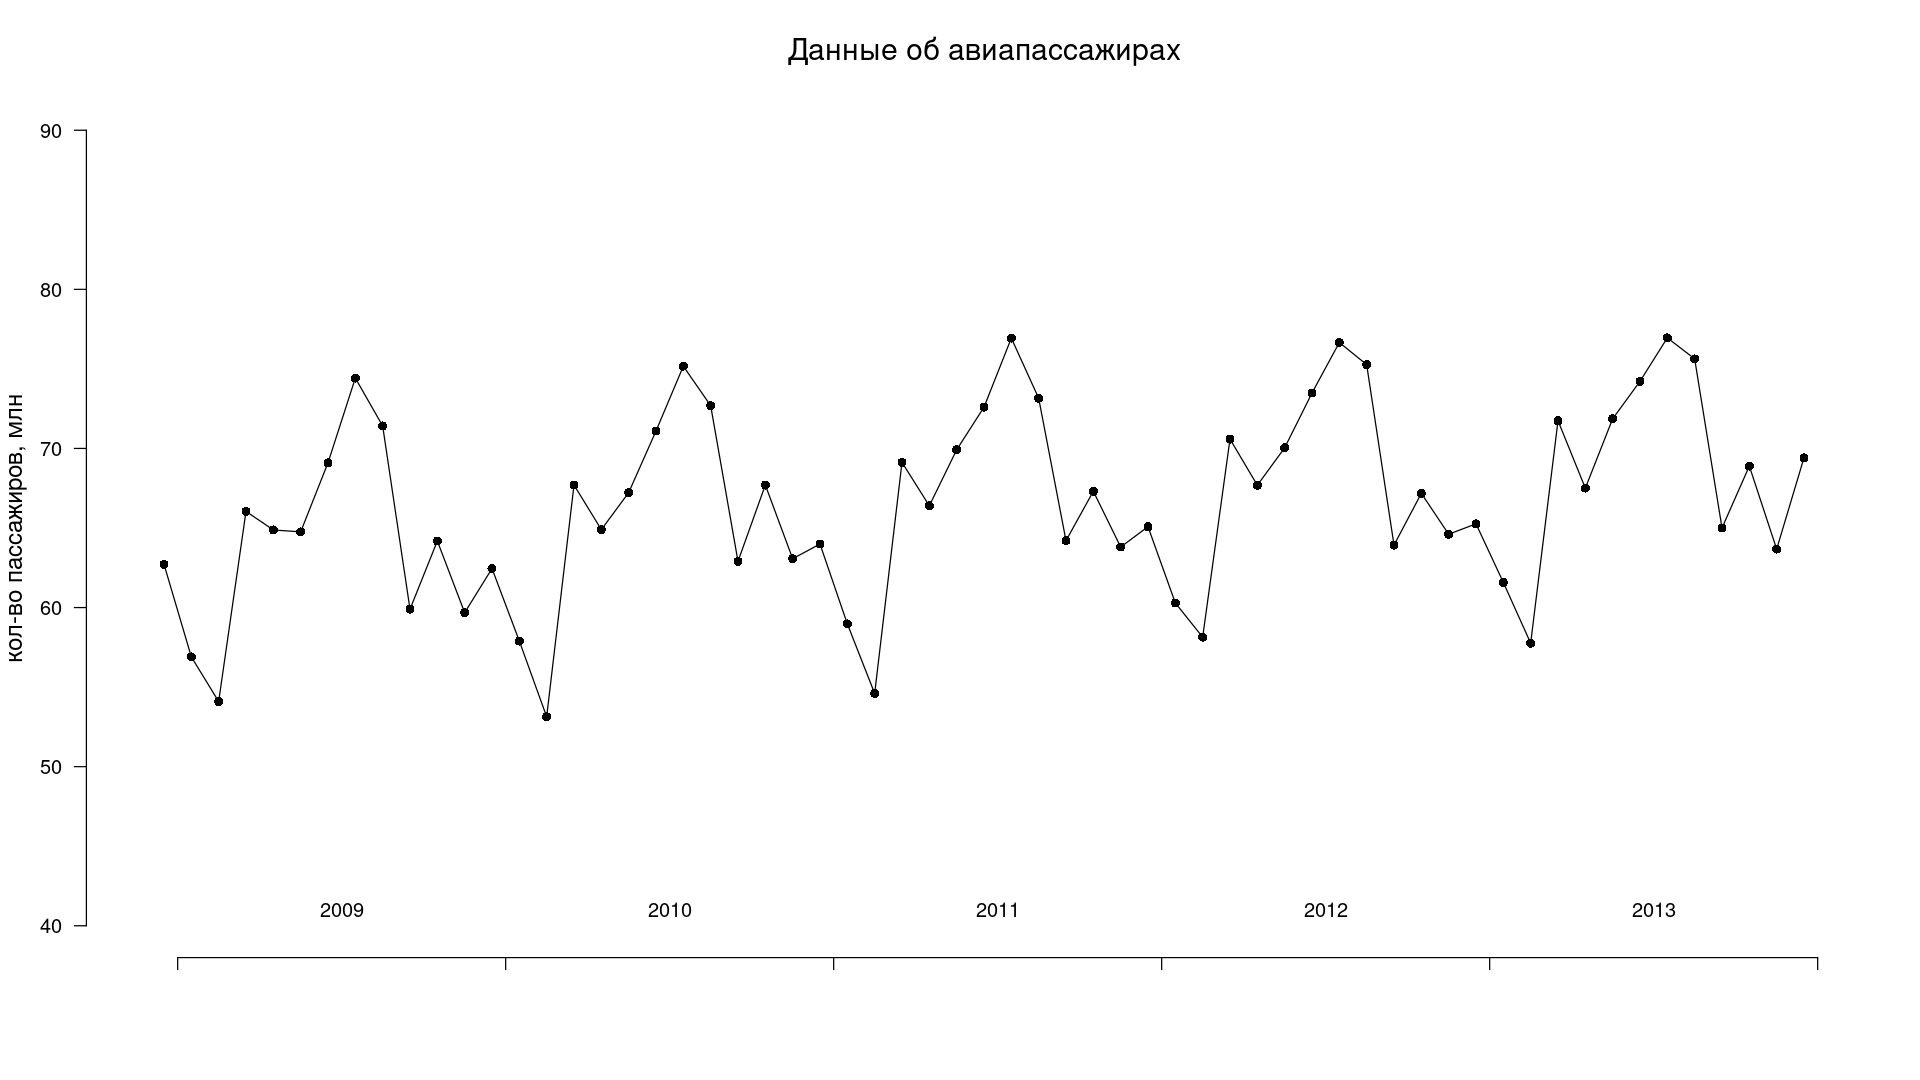

In [3]:
# plot
plotTotal = function(main) {
      plot(data$TOTAL, type='o', pch=16, axes=FALSE, xlab='', ylab='кол-во пассажиров, млн', ylim=c(40, 90), 
          main = main, font.main = 1, cex.lab=1.2, cex.main=1.5)
      axis(2, las=2, line=0.5)
      axis(1, at=c(1.5+0:5*12), labels = FALSE)

      for(i in 0:4) {
          text(7.5+12*i, 41, paste(2009+i))
      }
}
plotTotal('Данные об авиапассажирах')

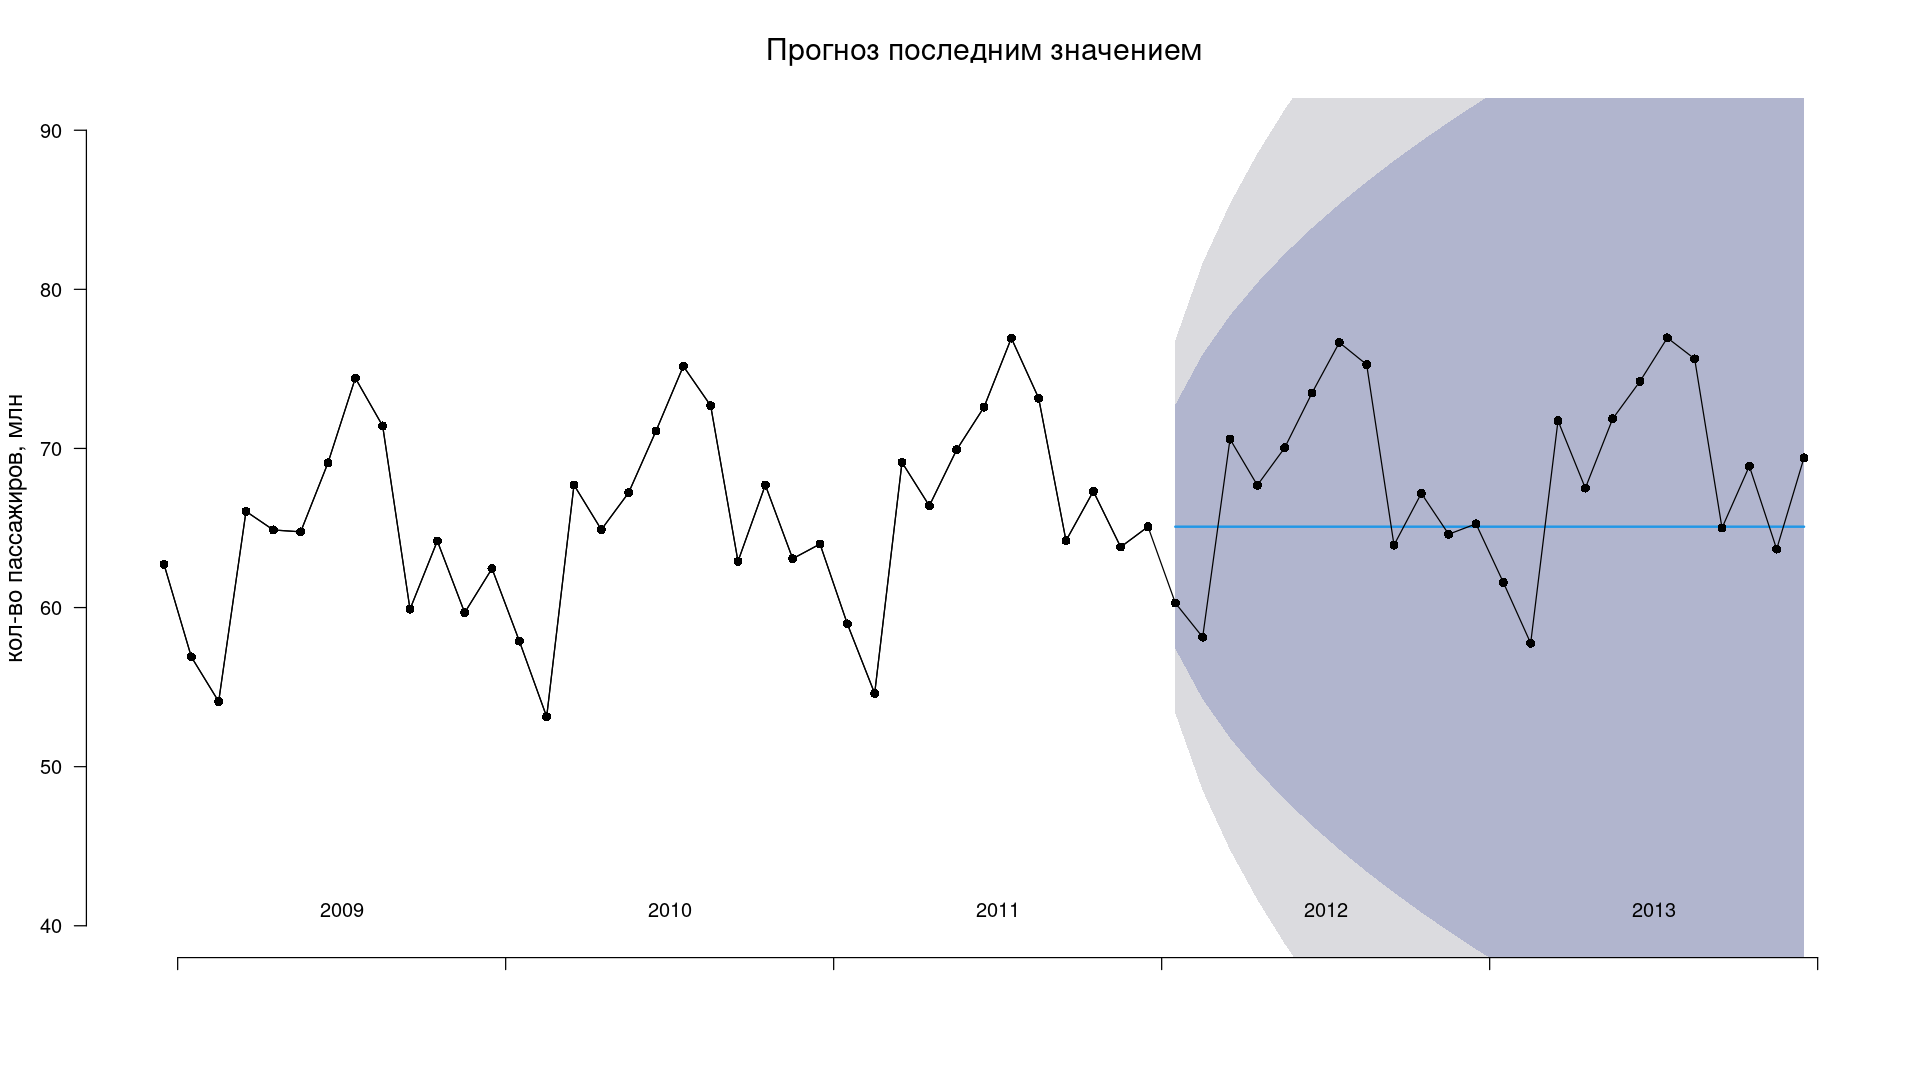

In [4]:
# naive forecast
fit <- arima(data$TOTAL[1:37], order = c(0, 1, 0))
plot(forecast(fit,h=24), type='o', pch=16, axes=FALSE, main='', ylim=c(40,90))
par(new = TRUE)
plotTotal('Прогноз последним значением')

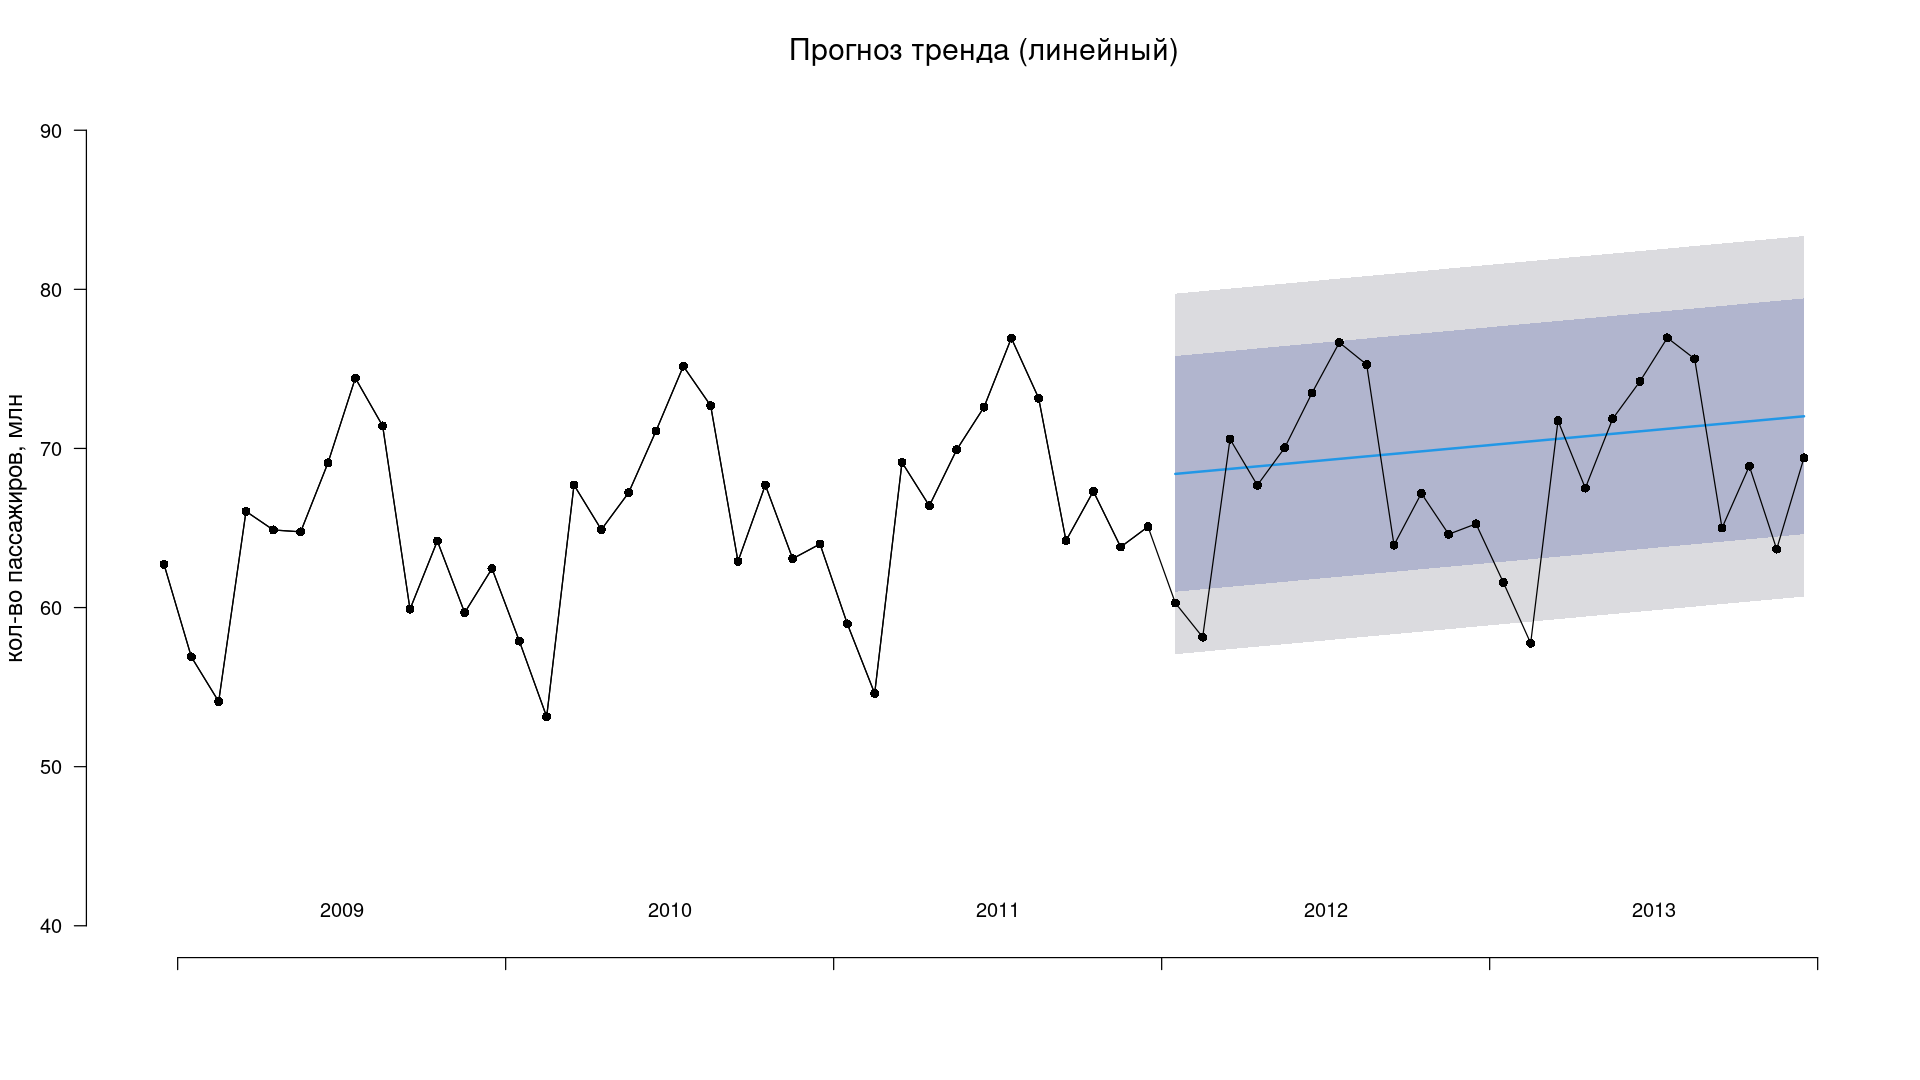

In [5]:
# linear
fit <- Arima(data$TOTAL[1:37], order = c(0, 0, 0), seasonal = list(order = c(0, 0, 0), period = 0), 
             include.drift = TRUE, include.mean = TRUE)
plot(forecast(fit,h=24), type='o', pch=16, axes=FALSE, main='', ylim=c(40,90))
par(new = TRUE)
plotTotal('Прогноз тренда (линейный)')

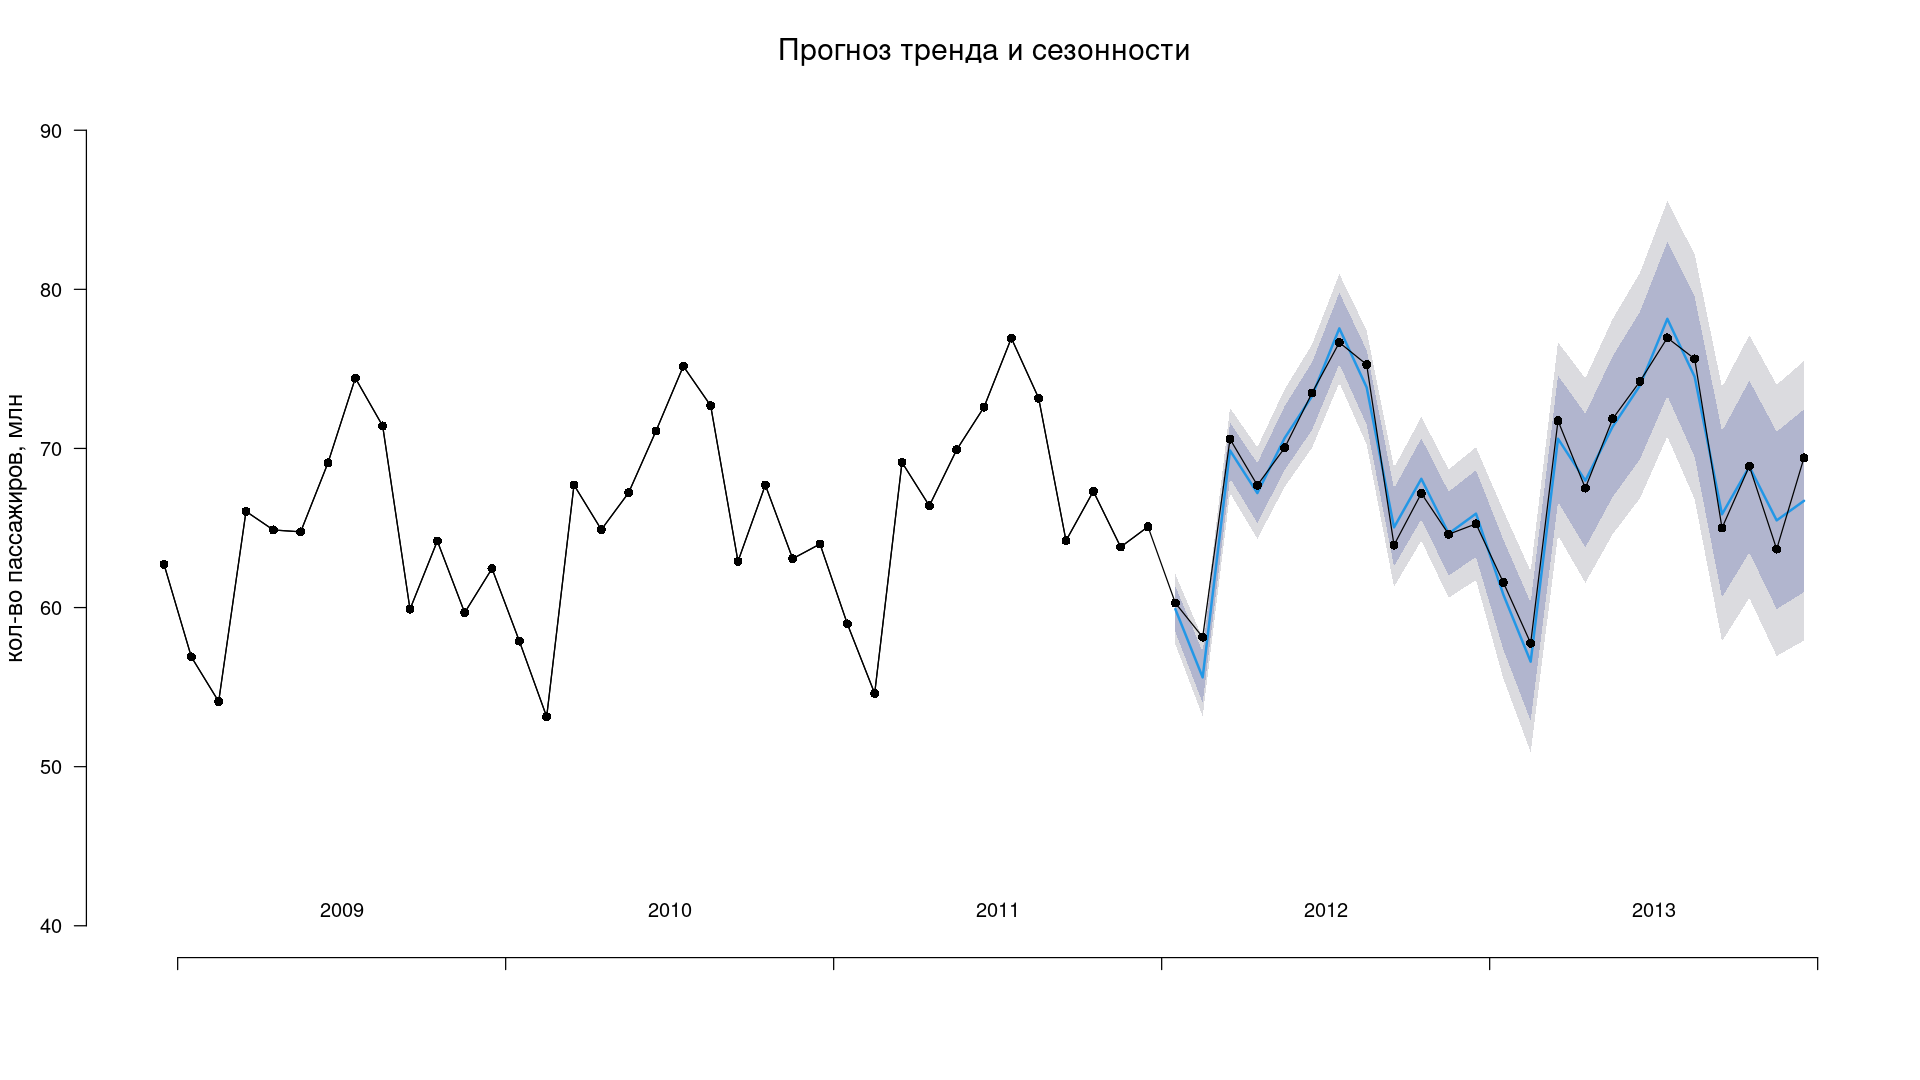

In [6]:
# arima
fit <- Arima(data$TOTAL[1:37], order = c(0, 1, 1), seasonal = list(order = c(1, 0, 0), period = 12))
plot(forecast(fit,h=24), type='o', pch=16, axes=FALSE, main='', ylim=c(40, 90))
par(new = TRUE)
plotTotal('Прогноз тренда и сезонности')